# **CLIP MODEL** 

In [160]:
import transformers
import datasets
import numpy as np
import pandas as pd
import torch
import pathlib
from PIL import Image
import requests
import os
from matplotlib.pylab import plt
import tensorflow as tf

from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

## CREATE THE MODEL

In [161]:
image_dir = './fruits-360/fruits-360_dataset/fruits-360/Validation/'

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "openai/clip-vit-base-patch32"

tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)

# SETUP IMAGE INFORMATION

In [162]:
image_info = {}
image_names = []
categories = os.listdir(image_dir)
for idx, category in enumerate(categories):
    image_path = os.path.join(image_dir, category)
    images = os.listdir(image_path)
    # SELECT ONLY 10 IMAGES FOR EACH FRUIT TYPE TO SEE RESULTS QUICKLY
    for image in images[:10]:
        file_path = os.path.join(image_path, image)
        image_names.append(category + ' image')
        if not category in image_info:
            image_info[category] = []
        image_info[category].append(file_path)       

## RUN THE MODEL

In [163]:
true_proba = []
predicted = []

for image_name, image_paths in image_info.items():
    images = []
    for image_path in image_paths:
        images.append(Image.open(image_path))
    text_prompts = ['A photo of a ' + image_name, ' A photo of a ' + 'Jackfruit']
    inputs = processor(text=text_prompts, images=images, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image 
    probs = logits_per_image.softmax(dim=1)
    for prob in probs:
        pred = prob.detach().numpy().argmax()
        predicted.append(pred)
        true_proba.append(prob[0].item())  

# PLOT THE ACCURACY

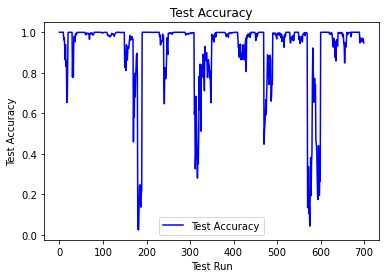

In [164]:
epochs = range(0,len(true_proba))
plt.plot(epochs, true_proba, 'b', label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Test Run')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

# MODEL ACCURACY

In [165]:
print('total accuracy ', sum(true_proba) / len(true_proba))

total accuracy  0.9168386711020555


# CONFUSION MATRIX

In [166]:
labels = len(predicted) * [0]
cm = tf.math.confusion_matrix(labels, predicted)
print(cm)

tf.Tensor(
[[660  40]
 [  0   0]], shape=(2, 2), dtype=int32)
